In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from common_functions import open_connection, translate_products
from sql_queries import ordered_product, product_reviews, sellers_sold_items, translation_table

#### **Basic Setup**

In [2]:
# Database file path location
DATABASE_FILE = "olist.db"
connection = open_connection(DATABASE_FILE)

Connection is successful


### **Case 1: Analyzing products which are ordered the most**

#### **Loading data and show basic table information**

In [3]:
# Importing table from the database
df_ordered_products = pd.read_sql(ordered_product, connection)
df_ordered_products.head()

,order_id,product_name
0,00010242fe8c5a6d1ba2dd792cb16214,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,pet_shop
2,000229ec398224ef6ca0657da4fc703e,moveis_decoracao
3,00024acbcdf0a6daa1e931b038114c75,perfumaria
4,00042b26cf59d7ce69dfabb4e55b4fd9,ferramentas_jardim


In [4]:
# Checking query information
print("Table shape:\n", df_ordered_products.shape)
print("\nTable information")
df_ordered_products.info()

Table shape:
 (112650, 2)

Table information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   order_id      112650 non-null  object
 1   product_name  111047 non-null  object
dtypes: object(2)
memory usage: 1.7+ MB


#### **Data Cleaning - Finding missing data**

In [5]:
# Checking null value
df_ordered_products.isna().sum()

order_id           0
product_name    1603
dtype: int64

In [6]:
df_ordered_products[df_ordered_products.isna().any(axis=1)]

,order_id,product_name
123,0046e1d57f4c07c8c92ab26be8c3dfc0,None
125,00482f2670787292280e0a8153d82467,None
132,004f5d8f238e8908e6864b874eda3391,None
142,0057199db02d1a5ef41bacbf41f8f63b,None
171,006cb7cafc99b29548d4f412c7f9f493,None
...,...,...
112306,ff24fec69b7f3d30f9dc1ab3aee7c179,None
112333,ff3024474be86400847879103757d1fd,None
112350,ff3a45ee744a7c1f8096d2e72c1a23e4,None
112438,ff7b636282b98e0aa524264b295ed928,None


In [7]:
# Change the product Category to Unknown in Our Query
df_ordered_products["product_name"].fillna("Unknown", inplace=True)

# Re-Checking The Null Value
df_ordered_products.isnull().sum()

order_id        0
product_name    0
dtype: int64

#### **Data Cleaning - Finding Duplicates**

In [8]:
df_ordered_products[df_ordered_products.duplicated(keep=False)]

,order_id,product_name
13,0008288aa423d2a3f00fcb17cd7d8719,ferramentas_jardim
14,0008288aa423d2a3f00fcb17cd7d8719,ferramentas_jardim
32,00143d0f86d6fbd9f9b38ab440ac16f5,esporte_lazer
33,00143d0f86d6fbd9f9b38ab440ac16f5,esporte_lazer
34,00143d0f86d6fbd9f9b38ab440ac16f5,esporte_lazer
...,...,...
112635,fff8287bbae429a99bb7e8c21d151c41,informatica_acessorios
112640,fffb9224b6fc7c43ebb0904318b10b5f,relogios_presentes
112641,fffb9224b6fc7c43ebb0904318b10b5f,relogios_presentes
112642,fffb9224b6fc7c43ebb0904318b10b5f,relogios_presentes


In [9]:
df_ordered_products[df_ordered_products.duplicated(keep=False)]

,order_id,product_name
13,0008288aa423d2a3f00fcb17cd7d8719,ferramentas_jardim
14,0008288aa423d2a3f00fcb17cd7d8719,ferramentas_jardim
32,00143d0f86d6fbd9f9b38ab440ac16f5,esporte_lazer
33,00143d0f86d6fbd9f9b38ab440ac16f5,esporte_lazer
34,00143d0f86d6fbd9f9b38ab440ac16f5,esporte_lazer
...,...,...
112635,fff8287bbae429a99bb7e8c21d151c41,informatica_acessorios
112640,fffb9224b6fc7c43ebb0904318b10b5f,relogios_presentes
112641,fffb9224b6fc7c43ebb0904318b10b5f,relogios_presentes
112642,fffb9224b6fc7c43ebb0904318b10b5f,relogios_presentes


In [10]:
# Removing duplicates
df_ordered_products.drop_duplicates(keep="first", inplace=True)

# Re-check duplicates
df_ordered_products[df_ordered_products.duplicated()]

,order_id,product_name


### **Data Formatting and Manipulaton**

In [11]:
df_ordered_products.head()

,order_id,product_name
0,00010242fe8c5a6d1ba2dd792cb16214,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,pet_shop
2,000229ec398224ef6ca0657da4fc703e,moveis_decoracao
3,00024acbcdf0a6daa1e931b038114c75,perfumaria
4,00042b26cf59d7ce69dfabb4e55b4fd9,ferramentas_jardim


In [12]:
## Create Translation Table with Pandas
df_translation_table = pd.read_sql(translation_table, connection)

## Get Translation Dictionary
new_product_name = translate_products(df_translation_table)
print(new_product_name)

{'beleza_saude': 'Health beauty', 'informatica_acessorios': 'Computers accessories', 'automotivo': 'Auto', 'cama_mesa_banho': 'Bed bath table', 'moveis_decoracao': 'Furniture decor', 'esporte_lazer': 'Sports leisure', 'perfumaria': 'Perfumery', 'utilidades_domesticas': 'Housewares', 'telefonia': 'Telephony', 'relogios_presentes': 'Watches gifts', 'alimentos_bebidas': 'Food drink', 'bebes': 'Baby', 'papelaria': 'Stationery', 'tablets_impressao_imagem': 'Tablets printing image', 'brinquedos': 'Toys', 'telefonia_fixa': 'Fixed telephony', 'ferramentas_jardim': 'Garden tools', 'fashion_bolsas_e_acessorios': 'Fashion bags accessories', 'eletroportateis': 'Small appliances', 'consoles_games': 'Consoles games', 'audio': 'Audio', 'fashion_calcados': 'Fashion shoes', 'cool_stuff': 'Cool stuff', 'malas_acessorios': 'Luggage accessories', 'climatizacao': 'Air conditioning', 'construcao_ferramentas_construcao': 'Construction tools construction', 'moveis_cozinha_area_de_servico_jantar_e_jardim': 'Ki

In [13]:
# Replacing the current product name with cleaned and translated data
df_ordered_products["product_name"].replace(new_product_name, inplace=True)

# Re-check the unformated data
unformatted_data = []
for product in df_ordered_products["product_name"].unique():
    if "_" in product:
        unformatted_data.append(product)

unformatted_data

['portateis_cozinha_e_preparadores_de_alimentos', 'pc_gamer']

In [14]:
# Adding unformatted and not translated data
new_product_name["pc_gamer"] = "PC Gamer" 
new_product_name["portateis_cozinha_e_preparadores_de_alimentos"] = "Kitchen and Food Preparation racks"

# Replacing unformatted and not translated data
df_ordered_products["product_name"].replace(new_product_name, inplace=True)

# Re-checking the data
unformatted_data = []
for product in df_ordered_products["product_name"].unique():
    if "_" in product:
        unformatted_data.append(product)

unformatted_data

[]

#### **Group and Transform Data**

In [15]:
df_product_analysis = df_ordered_products.groupby("product_name").agg("count")

df_product_analysis.rename(columns={"order_id": "order_counts"}, inplace=True)
df_product_analysis.head()

,order_counts
product_name,
Agro industry and commerce,182
Air conditioning,253
Art,202
Arts and craftmanship,23
Audio,350


In [16]:
df_product_analysis.reset_index(inplace=True)
df_product_analysis

,product_name,order_counts
0,Agro industry and commerce,182
1,Air conditioning,253
2,Art,202
3,Arts and craftmanship,23
4,Audio,350
...,...,...
69,Tablets printing image,79
70,Telephony,4199
71,Toys,3886
72,Unknown,1451


### **Data Analysis**

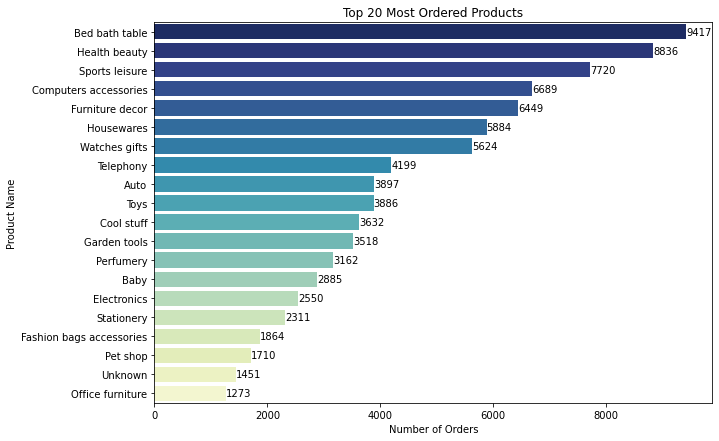

In [17]:
# Get Top 10 most ordered products
most_ordered_product = df_product_analysis.sort_values("order_counts", ascending=False)[:20]


# Create chart
plt.figure(figsize=(10, 7))

ax1 = sns.barplot(x="order_counts", y="product_name",
                  palette="YlGnBu_r", data=most_ordered_product)

# Adding data label into the graph
ax1.bar_label(ax1.containers[0])

# Adding table name and axes labels
plt.title("Top 20 Most Ordered Products")
plt.xlabel("Number of Orders")
plt.ylabel("Product Name")
plt.show()

### **Case 2: Analyzing products which are ordered the most**

#### **Loading data and show basic table information**

In [ ]:
df_product_reviews = pd.read_sql(product_reviews, connection)
df_product_reviews.head()

In [ ]:
print("Data Frame Shape: ", df_product_reviews.shape)
print("\nData Frame information")
df_product_reviews.info()

#### **Data Cleaning - Finding missing data**

In [ ]:
df_product_reviews.isnull().sum()

In [ ]:
df_product_reviews["product_name"].fillna("Unknown", inplace=True)
df_product_reviews.isna().sum()

In [ ]:
df_review_table = pd.read_sql("SELECT review_id, review_score "
                              "FROM olist_order_reviews_dataset", connection)
df_review_table.isna().sum()

In [ ]:
df_order_table = pd.read_sql("SELECT order_id FROM olist_order_dataset", connection)
df_order_table.isna().sum()

In [ ]:
df_order_item_table = pd.read_sql("SELECT product_id, order_id "
                                  "FROM olist_order_items_dataset", connection)
df_order_item_table.isna().sum()

In [ ]:
cte_query = """
SELECT
	order_items.product_id,
	order_data.order_id,
	reviews.review_id,
	reviews.review_score,
	order_data.order_status
FROM olist_order_dataset AS order_data
LEFT JOIN olist_order_reviews_dataset AS reviews ON order_data.order_id = reviews.order_id
LEFT JOIN olist_order_items_dataset AS order_items ON order_data.order_id = order_items.order_id
"""
df_cte_table = pd.read_sql(cte_query, connection)
df_cte_table.isna().sum()

In [ ]:
df_product_reviews.dropna(subset=["review_score"], inplace=True)
df_product_reviews.isna().sum()

#### **Data Cleaning - Finding Duplicates**

In [ ]:
df_product_reviews[df_product_reviews.duplicated(keep=False)]

In [ ]:
df_product_reviews.drop_duplicates(keep="first", inplace=True)

#Re-Check duplicates
df_product_reviews[df_product_reviews.duplicated()]

#### **Data Formatting and Manipulaton**

In [ ]:
df_product_reviews.replace(new_product_name, inplace=True)
df_product_reviews["product_name"].head()

In [ ]:
df_product_reviews.info()

In [ ]:
df_product_reviews = df_product_reviews.astype({"review_score": "int64"})
df_product_reviews.info()

#### **Group and Transform Data**

In [ ]:
df_review_analysis = df_product_reviews.groupby("review_score").agg("count")
df_review_analysis.head()

In [ ]:
df_review_analysis.reset_index(inplace=True)
df_review_analysis.head()

### **Data Analysis**

In [ ]:
# Colors
colors = ['#FF0000', '#0000FF', '#FFFF00', 
          '#ADFF2F', '#FFA500']

explode = (0.05, 0.05, 0.05, 0.05, 0.05)


plt.pie(df_review_analysis["product_name"],
        colors=colors, labels=df_review_analysis["review_score"],
        autopct="%1.1f%%", pctdistance=0.85, explode=explode)

centre_circle = plt.Circle((0, 0), 0.70, fc="white")
fig = plt.gcf()

fig.gca().add_artist(centre_circle)

plt.show()

### **Case 2: Analyzing products ordered by sellers**

#### **Loading data and show basic table information**

In [ ]:
df_sellers_products = pd.read_sql(sellers_sold_items, connection)
df_sellers_products.head()

In [ ]:
print("Data Frame Shape: ", df_sellers_products.shape)
print("\nData Frame information")
df_sellers_products.info()

In [ ]:
df_sellers_products.isnull().sum()

#### **Data Cleaning - Finding missing data**

In [ ]:
df_sellers_products.isnull().sum()

In [ ]:
df_sellers_products[df_sellers_products["product_name"].isnull()]

In [ ]:
df_sellers_products["product_name"].fillna("Unknown", inplace=True)

# Re-Checking missing values
df_sellers_products.isna().sum()

#### **Data Cleaning - Finding Duplicates**

In [ ]:
df_sellers_products[df_sellers_products.duplicated(keep=False)]

In [ ]:
df_sellers_products.drop_duplicates(keep="first", inplace=True)

# Re-checking duplcates
df_sellers_products[df_sellers_products.duplicated()]

#### **Data Formatting and Manipulaton**

In [ ]:
df_sellers_products.replace(new_product_name, inplace=True)
df_sellers_products["product_name"].head()

#### **Group and Transform Data**

In [ ]:
df_sellers_analysis = df_sellers_products.groupby("product_name").agg("count")
df_sellers_analysis.head()

In [ ]:
df_sellers_analysis.reset_index(inplace=True)

### **Data Analysis**

In [ ]:
sellers_products = df_sellers_analysis.sort_values("seller_id", ascending=False)[:20]


# Create chart
plt.figure(figsize=(10, 7))

ax1 = sns.barplot(x="seller_id", y="product_name",
                  palette="YlGnBu_r", data=sellers_products)

# Adding data label into the graph
ax1.bar_label(ax1.containers[0])

# Adding table name and axes labels
plt.title("Top 20 Most Ordered Products By Sellers")
plt.xlabel("Number of Orders")
plt.ylabel("Product Name")
plt.show()